# Monte Carlo Simulation

A Monte Carlo Simulation is a plain Simulation. In my view, the key reason for simulation in finance is to look at quantities of interest for which you do no have closed form solutions. A closed-form solution means the solution is given explicit (in terms of numbers and letters). A semi-closed form solution means the solution is given in terms of numbers, letters and integrals. If the solution is neither in closed- nor in semi-closed form, you can still simulate to visualize the solution. 

Any simulation has known constants, random shocks and seeds. Do not forget about the seeds. Seeds start the sequence of random numbers that are generated on a computer. 

This lecture teaches you the essentials on simulation with a focus on financial data applications.

# A. Online Lecture

$$
\\
$$

## A.1 Monte Carlo Simulations

# B Tutorial and Revision Manual

## B.1 Motivation

 

Consider a stationary AR(1) process with $|\phi|<1$ and $0 \leq \sigma^2_{\epsilon} < \infty$ and $x_0 < \infty$ and mean $\bar{x} \in \mathcal{R}$, i.e.

$$
x_t = (1-\phi) \times \bar{x} + \phi \times x_{t-1} + \epsilon_t, \quad \epsilon_t \sim i.i.d.(0,\sigma^2_{\epsilon}).
$$

Importantly, to an investor, $\phi$, $\sigma^2_{\epsilon}$, $\bar{x}$ and $x_0$ are known constants. Therefore, for the investor, the only unknown and from an ex-ante perspective the random outcome is the sequence of $\{\epsilon_t\}_t$. 



Since $\epsilon_t$ is a random variable, and $\{\epsilon_t\}_t$ is a stochastic process, we can characterize $\{\epsilon_t\}_t$ by its probability density function. If we have that, we can determine its first, second and any other moment or specific quantiles or risk measures such as the Value-at-Risk. 



Simulation is a way to quantify that probability density function in a numerical way. 



The only challenge for simulating $\{\epsilon_t\}_t$ and hence $\{x_t\}_t$ is that we need to know the probability density function of $\epsilon_t$. Hence, we must explicitly take a stand on which $i.i.d.$ distribution does $\epsilon_t$ follow. A common assumption is that $\epsilon_t$ follows a Gaussian White Noise process. It therefore suffices to understand how to simulate a Gaussian 

$$
N(0,1)
$$

random variable. Any other univariate Gaussian variable 

$$
N(a,b^2)
$$ 

can be expressed as

$$
a + b \times N(0,1).
$$


## B.2 Generating Random Numbers

- Notice, simulating random numbers is at the core of any Monte Carlo simulation

- Random numbers that a computer generates appear random but are produced by a deterministic algorithm

- This has the advantage that everyone is able to re-run simulations of others with exactly the same sequence of random numbers

- Strictly speaking, we therefore talk about **Pseudo Random Numbers**.

$$
\\
$$

Any random number can be drawn from a **U(0,1)**

- Any pseudo-random number generator for $U(0,1)$ takes the form:


$$
x_{i+1} = f(x_i) \quad \text{and} \quad u_{i+1} = g(x_{i+1})
$$


where $f$ and $g$ are deterministic functions and $x_i$ could be vector valued.  

- Any random number generator will eventually produce a sequence of $x_i$ and $u_i$ that has already occurred. 

- A good random number generator does therefore need to:


* have a long period (i.e. produce many distinct values before repeating)


* allow to reproduce any random sequence


* to be fast


* be portable across computing platforms


* to produce output that statistically speaking appears random


$$
\\
$$

 
**Example 1:**  $x_{0}=1, c = 0, a = 11, m = 16$ 



The first 5 entries of the sequence are
$$
x_{0}\ =\ 1
$$
$$
x_{1}\ =\ (11)\ \mathrm{m}\mathrm{o}\mathrm{d}\ 16=11
$$
$$
x_{2}\ =\ (121)\ \mathrm{m}\mathrm{o}\mathrm{d}\ 16=9
$$
$$
x_{3}\ =\ (99)\ \mathrm{m}\mathrm{o}\mathrm{d}\ 16=3
$$
$$
x_{4}\ =\ (33)\ \mathrm{m}\mathrm{o}\mathrm{d}\ 16=1
$$
 

**Observation:** $x_4$ coincides with the seed $x_0$.  The 'period' in this example is only '4'.


$$
\\
$$
 
**Learning point:** Good pseudo-random number generators have a large 'period'.  


$$
\\
$$
  

Once we are able to draw random numbers from $U(0,1)$, we continue to draw a 

$$
\textbf{U(a,b)}
$$

 

If $U_i \sim U(0,1)$ for $i = 1,...,n$. Then,

$$
x_i = a + (b-a) u_i
$$

follows a $U(a,b)$ distribution.


$$
\\
$$


**'Inverse Transform Method'**.  



Suppose you have access to uniformly distributed random numbers $U$, with 

$$
U \sim U(0,1)
$$

and further assume you want to draw a random variable, which we call $X$, and that has a Cumulative Density Function $F(X=x)$.


According to the Inverse Transform method

$$
X = F^{-1}(U), \quad \text{for} \quad U \sim U(0,1).
$$
Said differently, once you take a $U(0,1)$ variable and you plug it into the inverse of the CDF from which you would like to sample from, you end up with a draw from $F(x)$.




The Inverse Transform method relies on $F$ being well defined, strictly increasing and available in closed-form. The inverse transform method is attractive but not the fastest sampling method. Yet, in order to get the concept of random number generation, it is really useful to understand the working of the Inverse Transform Method.

$$
\\
$$

The Gaussian does not have an analytial CDF.  Alternatives to the Inverse Transform Method have been developed. One such alternative is the well known \textbf{Box-Muller method}.  The algorithm for the **Box-Muller method** is as follows:

* Input: Pairwise independent $U_1 \sim U(0,1)$ and $U_2 \sim U(0,1)$


* Output: Pairwise independent $N_1 \sim N(0,1)$ and $N_2 \sim N(0,1)$


* Box-Muller method:
\begin{align}
 N_1 &:= \sqrt{-2\log(U_{1})} \times \cos(2\pi U_{2}) \\
N_2 &:= \sqrt{-2\log(U_{1})} \times \sin(2\pi U_{2}).
\end{align}

 
It can be shown that the joint density of $N_1$ and $N_2$ is multivariate Gaussian (with a zero-covariance, zero mean and unit variance), i.e.

$$
Prob(N_1=n_1, \, N_2 = n_2) = \frac{1}{\sqrt{2 \pi}} \exp(-n^2_1 / 2) \; \times \; \frac{1}{\sqrt{2 \pi}} \exp(-n^2_2 / 2).
$$

$$
\\
$$

Nowadays, Matlab, R, Python and other statistical packages use Mersenne Twister to draw Gaussian variables more efficiently.  

## B.3 Simulating ARMA Processes

 
Note, simulating the probability density function that an ARMA(p,q) is straightforward.
$$
\\
$$

* Decide on the order $p \; \text{and} \; q$ that you want to use
$$
\\
$$

* Decide upon the numerical values that the parameters of the ARMA(p,q) model take (incl the starting value)
$$
\\
$$

* Decide upon the iid distribution that the white noise innovation $\epsilon$ shall follow
$$
\\
$$

* Decide on how many time periods $T$ you want to simulate
$$
\\
$$

* Decide how many random paths per time period, which we call here $P$ you like to simulate. Note, as $\epsilon$ is a random variable that can take infinitely many values, there are infinite many possible realization for the ARMA(p,q) process. Each path corresponds to one such realizations. 
$$
\\
$$


* Set the seed of the random generator, i.e. $x_0 = \text{seed}.$.
$$
\\
$$

* Simulate the matrix of White Noise shocks with dimension $T \times P.$ Note, for that you have to use the chosen distribution. 
$$
\\
$$

* Usually, I would simulate a full path with length $T\times 1$ and repeat that $P$ times.  

 

---

# C. Quizzes - Basics

see ilias.

# D. Exercises - Basics

## D.1 Parameters in a Simulation

Which quantities are known vs unknown if you want to simulate a specific ARMA(p,q) model?

## D.2 Random Number Generator

What characterizes a good random number generator?

# E. Exercises - Challenging  

## E.1 Pseudo Random Number Generator

Assume a linear congruential random number generator has the paramerization: $seed = 1, c = 0, a=11, m = 16$. Use that as a practical example to explain the working of a pseudo-random number generator. Compute the sequence of the first 5 entries and determine its period.

## E.2 Inverse Transfor Theorm

Explain the meaning of the following expression: $X = F^{-1}(U)$ where $F(x)$ is the CDF of $x$ and U is uniformly distributed between 0 and 1.

## E.3 Box-Muller Method

Explain the Box-Muller Method.

## E.4 Pseudo-Code

Suppose you work with an ARMA(p,q) model and Gaussian White Noise shocks $\epsilon$. Write a pseudo-code that plots a time-series of histograms. The histogram shall represent 1000 realizations of the ARMA(p,q) process, with 10 bins, whereas the time-series dimension is of magnitude 2x1 only.

# F. Python for Financial Data Analysis

Dear students,

We approach the time-series modeling part as follows. First, you learn about ARMA models. Second, you learn how to siumulate these. Third, you learn how to estimate these. These estimations will lead us into the machine learning aspects of our course.

We are currently learning about how to simulate stochastic processes. Our application of choice are ARMA models. 

I provide you with a set of Python applications on the basics for simulation: (i) simulating from a uniform, (ii) Gaussian, (iii) multi variate Gaussian and (iv) simulating an ARMA process.

## F.1 Simulating U(a,b) with a=0 and b=1

Here, we do the following. We generate 10 000 data points of a U(0,1) distributed random variable. Next, we plot the results as a histogram with 15 bins. We fix the seed to 99.
 
Make sure to play around with the seed to see its effect.

We load the packages of interest

In [1]:
#packages
import numpy as np
import matplotlib.pyplot as plt

Numpy offers a random number generator. We fix its seed to 99. Notice, the seed ensures everyone can re-generate your "stochastic" results to verify your work.

In [3]:
#seed
np.random.seed(99) 

Next, we draw 10,000 times from U(0,1) and save it in $x$

In [4]:
# 10,000 U(0,1) draws from numpy package
x = np.random.uniform(low=0, high=1, size=10000)

Next, we represent $x$ via a histogram with 15 bins

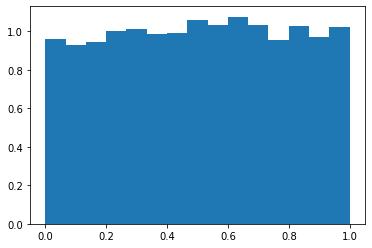

In [6]:
#plot U(0,1), using 15 bins on the [0,1] interval
count, bins, ignored = plt.hist(x, 15, density=True)

## F.2 Simulating N(0,1) 

Here, we do the following. We generate 10 000 data points of a N(0,1) distributed random variable. Next, we plot the results as a histogram with 15 bins. We fix the seed to 99.
 
Make sure to play around with the seed to see its effect.

First, we load the packages that we rely upon

In [7]:
#packages
import numpy as np
import matplotlib.pyplot as plt

Second, we fix the seed to the required value of 99 (for this exercise)

In [8]:
#seed
np.random.seed(99)

Third, we draw 10,000 times from a N(0,1) and save the output in $x$.

In [9]:
#10,000 N(0,1) draws from numpy package
x = np.random.normal(0, 1, size=10000)

Fourth, we represent $x$ via a histogram with 15 bins

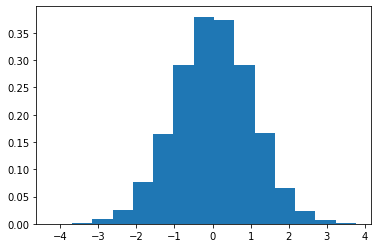

In [10]:
#plot N(0,1), using 15 bins of the [0,1] interval and normalize histogram to display prob density function
count, bins, ignored = plt.hist(x, 15, density=True)

## F.3 Simulating $MVN(\mu,\Sigma)$

Here, we do the following. We draw 10,000 times from a bivariate multivariate Gaussian distribution. First, we assume the pairwise correlation to be zero. So, the joint distribution will be iid in the time-series and cross-sectional dimension. The two-dimensional uncorrelated MVN of interest reads

$$
X_a \sim N(0,\Sigma_a), \quad \Sigma_a = \begin{pmatrix}1 & 0\\\ 0 & 1\end{pmatrix}.
$$  


Second, we compare the results to another sample of 10,000 draws from a strongly cross-sectionally correlated MVN

$$
X_b \sim N(0,\Sigma_b), \quad \Sigma_b = \begin{pmatrix}1 & 0.8\\\ 0.8 & 1\end{pmatrix}.
$$

Looking at both histograms visualizes the effect of correlation and pairwise independence.

Note, I on purpose wrote "cross-sectional", although I usually do not do that in these lecture notes. Yet, I want to introduce you to the concept that as you observe in each point of time returns of different assets, you basically observe a cross-section of returns. Correlated returns in the cross-section, is different than a correlation in the time-series dimension. The latter can be captured by ARMA models, while for the latter we need vector ARMA models, called VARMA, which I introduce you to at the end of our BSc course.

Note, work with a seed of 99, use 100 bins for the histograms.


First, we call the packages that we need

In [11]:
#packages
import numpy as np
import matplotlib.pyplot as plt

Second, we fix the seed to 99.

In [12]:
#seed
np.random.seed(99)

Third, we draw 10.000 realizations of a multivariate Gaussian. Notice, that in this example the multivariate Gaussian is nothing else than two pairwise indepenent univariate Gaussians with mean 0 and variance 1. Yet, in our notation, we work with multivariate calculus and code. We save the output in $X_a$

In [13]:
#X_a
mu_a = np.array([0, 0]) #mean
Sigma_a = np.array([[1, 0], [0, 1]]) #covariance matrix
x_1a, x_2a = np.random.multivariate_normal(mu_a, Sigma_a, 10000).T #draw

Fourth, we plot a two dimensional histogram for the 10,000 realizations of the bivariate output. 

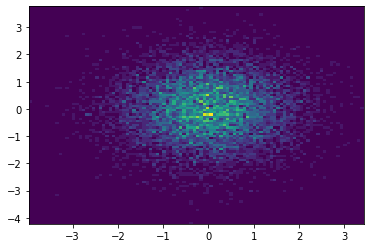

In [14]:
#plot X_a
plt.hist2d(x_1a, x_2a, bins=100, density=True) #100 bins and normalize histogram to form a prob density function
plt.show()

Fifth, simulate a strongly correlated bivariate Gaussian, with variance 1 and covariance 0.8. Save the output in $X_b$

In [15]:
#X_b
mu_b = np.array([0, 0]) #mean
Sigma_b = np.array([[1, 0.8], [0.8, 1]]) #covariance matrix
x_1b, x_2b = np.random.multivariate_normal(mu_b, Sigma_b, 10000).T #draw

Sixth, plot the two-dimensional histogram for $X_b$

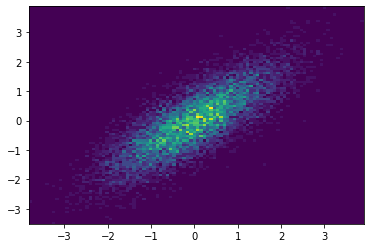

In [16]:
#plot X_b
plt.hist2d(x_1b, x_2b, bins=100, density=True)
plt.show()

## F.4 Simulate an AR(2) Process

Here, we simulate 500 observations of a mean-zero Gaussian AR(2) process with $\phi_1 = 0.6$, $\phi_2 = 0.2$ and $\sigma = 0.3$. Fix the seed to 1234. Use the first two residuals as starting values of the actual time series. Plot the time series and comment on its shape.

First, we load packages of interest

In [17]:
#packages
import numpy as np
import matplotlib.pyplot as plt

Second, fix the parameters of the AR(2) DGP

In [18]:
# DGP for AR(2) with N(0,sigma) shocks
phi_1 = 0.6 #lag 1 coefficient
phi_2 = 0.2 #lag 2 coefficient
sigma = 0.3 # vol (standard deviation) of residual

Third, fix the number of paths, the number of time points per path and the seed. In that example, we draw only ONE path. This path consists of 500 TIME POINTS. The seed takes the creative number of 1234.

In [19]:
#T draws 
T = 500  # sample length

#fixed seed of 1234
np.random.seed(1234) #rng seed

Fourth, here comes the key line for the simulation. We draw random realizations of the Gaussian residual with standard deviation $\sigma$ and save the output as $eps$. Note, as we draw 500 realizations, you can interpret that as 500 time points along one path.

In [20]:
#N(0,sigma) shocks
eps = np.random.normal(0, sigma, size=T)

Fifth, now that parameters and residual are known to the computer, we add them up according to the AR(2) DGP and save the output in $r$. The first two realized residuals are taken to coincide with $r_1$ and $r_2$. This is one way to do it (and the one that the exercise is asking for). 

In [21]:
#AR(2) DGP is sampled

#allocate numpy array to r
r = np.zeros(T)

#r_1 and r_2 are starting values, and here set to eps_1 and eps_2
r[0:2] = eps[0:2]

#loop through T
for t in range(2,T):
    r[t] = phi_1 * r[t-1] + phi_2 * r[t-2] + eps[t]    #AR(2) without constant
    

Sixth, we plot $r$. You can think of $r$ as being a time series of realized returns. The time-series exhibits a correlation because of $\phi_1$ and $\phi_2$. The larger these coefficients, the more persistent the time-series. Make sure to play around with these coefficients to get more intuition on how persistent, weakly persistent and non-persistent time series look like. 

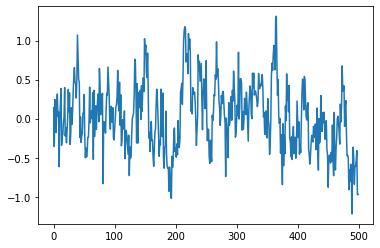

In [22]:
#visualize r
plt.plot(r);

Seventh, let me comment on the time-series. Relative to actual returns, the following properties are NOT captured by an ARMA model:

1. vol clustering 

2. jumps in returns

3. jumps in volatility.  

Note: vol clustering means that there are clusters of high volatility periods and clusters of low volatility periods. In ARMA models, the volatlity is always a constant $\sigma$. Later in the course, I teach you about ARCH-GARCH models to capture vol clustering.

Note: jumps in returns means that realized returns do not "diffuse", but can also change abruptly. "Diffusion" usually refers to Gaussian movements, while abrupt changes are 5, 10, 20 etc standard deviation events. In order to capture such events, $\epsilon$ needs to be two dimensional, where one dimension is a diffusion, while the other one could be Poisson jumps.

Note: Once we talk about modeling volatility, I will show you that realized volatility (standard deviation) exhibits 5+ standard deviation events. A clear indiciation of jumps in the second moment of returns.